# Exp 1: Basic Operations and Algebraic Operators for Digital Images #
## 1.	Aims ##

#### 1. Establish a Python environment and install some digital image processing libraries such as scikit-image, OpenCV, PIL, and matplotlib.

#### 2. Learn how to load, display, and save images.
    
#### 3. Be familiar with some basic image processing operations such as adding noise, image type conversion, image file format conversion, etc.

#### 4. Learn how to perform algebraic operations on digital images.

## 2.	Steps and Requirements

### (1) Load, Save and Display Images.	
(a) Load a PNG image (<font style="color:red;">'images/bunny.png'</font>) with Scikit-Image. (<font style="color:blue;">Tips: ``io.imread``</font>) 

(b) Convert it to PIL image format. (<font style="color:blue;">Tips: ``Image.fromarray``</font>) 

(c) Display this image with Matplotlib. (<font style="color:blue;">Tips: ``pyplot.imshow``</font>) 

(d) Convert PIL image format to OpenCV image format, save it as a JPEG image with the quality factor of 90. (<font style="color:blue;">Tips: ``cv2.imwrite``</font>)

(e) Load the JPEG image saved above, and save it as a BMP format and a TIFF format image, respectively.

C:\Users\12737\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


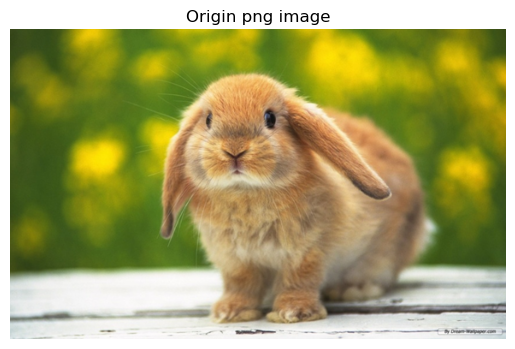

True

In [1]:
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np

# (a) Load a PNG image ('images/bunny.png') with Scikit-Image.
img1 = io.imread('images/bunny.png')
# (b) Convert it to PIL image format.
pil_img = Image.fromarray(img1)

# (c)Display this image with Matplotlib
plt.imshow(img1)
plt.axis('off')
plt.title('Origin png image')
plt.show()

# (d) Convert PIL image format to OpenCV image format, save it as a JPEG image with the quality factor of 90.
cv_image = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
cv2.imwrite("results/bunny.jpg", cv_image, [cv2.IMWRITE_JPEG_QUALITY, 90])


# (e) Load the JPEG image saved above, and save it as a BMP format and a TIFF format image, respectively.
ld_img = cv2.imread('results/bunny.jpg')
cv2.imwrite('results/bunny.bmp',ld_img)
cv2.imwrite('results/bunny.tiff',ld_img)



### (2)	Display Three Individual Color Components of RGB Images. 
(a) Load an image with OpenCV. 

(b) Display the R, G, and B color component of the image, respectively. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure. 

(c) Answer the question: What are the differences between the RGB image and the R/G/B components?

RGB image contains the combined information from all three color channels to represent a full-color image.
R/G/B components: Each component represents a grayscale image. They hold information about a single color channel, not the complete color picture.
RGB image displays the combination of the three channels
R/G/B components: Display as gray image with the intensity values of each channel


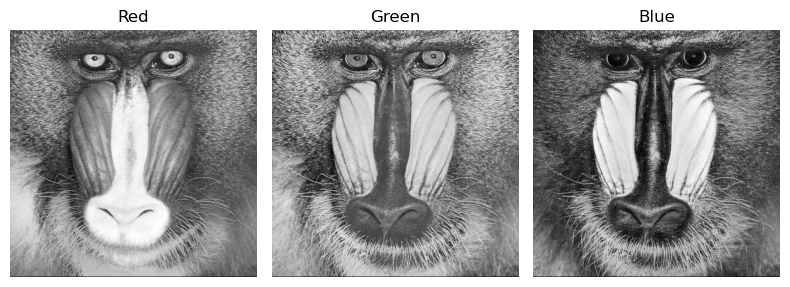

In [2]:
# (a) Load an image with OpenCV.
img2 = cv2.imread('images/RGBimageA.tiff')
b,g,r = cv2.split(img2)

# (b) Display the R, G, and B color component of the image, respectively. 
# Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.
plt.figure(figsize=(8, 4))

plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.title('Red')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.title('Green')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')
plt.title('Blue')
plt.axis('off')

plt.tight_layout()
plt.show

# (c) Answer the question: What are the differences between the RGB image and the R/G/B components?
print('RGB image contains the combined information from all three color channels to represent a full-color image.')
print('R/G/B components: Each component represents a grayscale image. They hold information about a single color channel, not the complete color picture.')
print('RGB image displays the combination of the three channels')
print('R/G/B components: Display as gray image with the intensity values of each channel')

### (3)	Convert Color Image to Grayscale. 

(a) Display the original Lena image and the grayscale images obtained by three grayscaling methods in the same figure. Add the corresponding title. 1)Maximum of the three components; 2) The average of the three components; 3) gray=0.30*r + 0.59*g + 0.11*b.

(b) Answer the question: What are their differences?

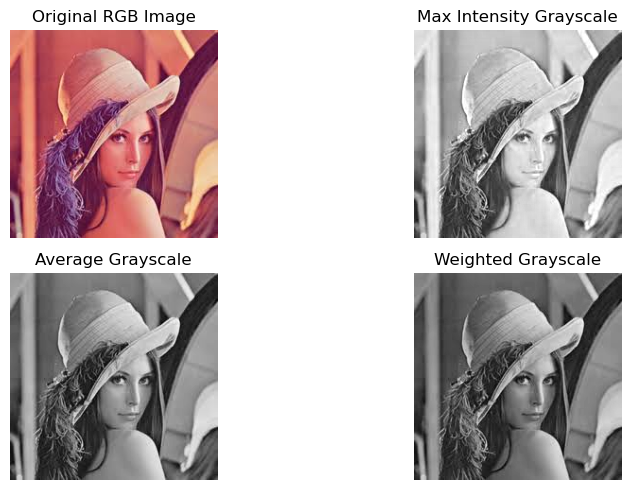

Max Intensity sclect the maximum value from R,G,B. The image will be brighter than the average, but some dark area might be lost 
Average Intensity compute the average value of all three color channel, and it gives a balanced grayscales representation
Weighted uses a weighted sum of the color channels with specific coefficients
It is considered the most perceptually accurate grayscale conversion


In [3]:
img3 = cv2.imread('images/lena.jpg')

# (a) Display the original Lena image and the grayscale images obtained by three grayscaling methods in the same figure
# 1)Maximum of the three components
max_grayscale = cv2.max(img3[:,:,0],cv2.max(img3[:,:,1],img3[:,:,2]))
# 2) The average of the three components
avg_grayscale = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
# 3) gray=0.30r + 0.59g + 0.11*b.
weight_grayscale = cv2.addWeighted(img3[:,:,0],0.3,img3[:,:,1],0.59,0.11)

img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))

# Display all the images
plt.subplot(2,2,1)
plt.imshow(img3) 
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(max_grayscale,cmap='gray')
plt.title('Max Intensity Grayscale')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(avg_grayscale,cmap='gray')
plt.title('Average Grayscale')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(weight_grayscale,cmap='gray')
plt.title('Weighted Grayscale')
plt.axis('off')

plt.tight_layout()
plt.show()

# (b) Answer the question: What are their differences?
print('Max Intensity sclect the maximum value from R,G,B. The image will be brighter than the average, but some dark area might be lost ')
print('Average Intensity compute the average value of all three color channel, and it gives a balanced grayscales representation')
print('Weighted uses a weighted sum of the color channels with specific coefficients')
print('It is considered the most perceptually accurate grayscale conversion')


### (4)	Image Cropping. 

(a) Load an RGB image ('images/lena.jpg'). 

(b) Select the 128x128 central region of the image. 

(c) Display the full image and its central part. 

(d) Save the central part as an image file in the same format as the full-size image.

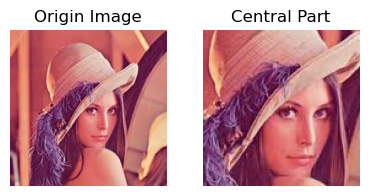

True

In [4]:
# (a) Load an RGB image ('images/lena.jpg').
img4 = cv2.imread('images/lena.jpg')
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

# (b) Select the 128x128 central region of the image.
height, width = img4.shape[:2]
center_x = width//2
center_y = height//2
cropsize = 128

# Find the location of the crop
top_left_x = max(0, center_x - cropsize // 2)
top_left_y = max(0, center_y - cropsize // 2)

bottom_right_x = min(width, top_left_x + cropsize)
bottom_right_y = min(height, top_left_y + cropsize)

# (c) Display the full image and its central part.
central_part = img4[top_left_y:bottom_right_y,top_left_x:bottom_right_x]

plt.figure(figsize=(4,2))

plt.subplot(1,2,1)
plt.imshow(img4)
plt.title('Origin Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(central_part)
plt.title('Central Part')
plt.axis('off')

plt.tight_layout()
plt.show()

# (d) Save the central part as an image file in the same format as the full-size image.
central_part = cv2.cvtColor(central_part,cv2.COLOR_RGB2BGR)
cv2.imwrite('results/central_lena.jpg',central_part)


### (5)	Adding Noise to Image. 

(a) Load an RGB image with Scikit-Image ('images/lena.jpg').

(b) Add 1) Gaussian noise, 2) salt noise, 3) pepper noise, 4) salt&pepper noise, and 5) speckle noise to it. The parameters can be chosen by yourself. (<font style="color:blue;">Tips: You may use ``random_noise`` in the ``util`` module of Scikit-Image</font>)

(c) Display these six images (including the original noiseless image) in the same figure and add the corresponding title.

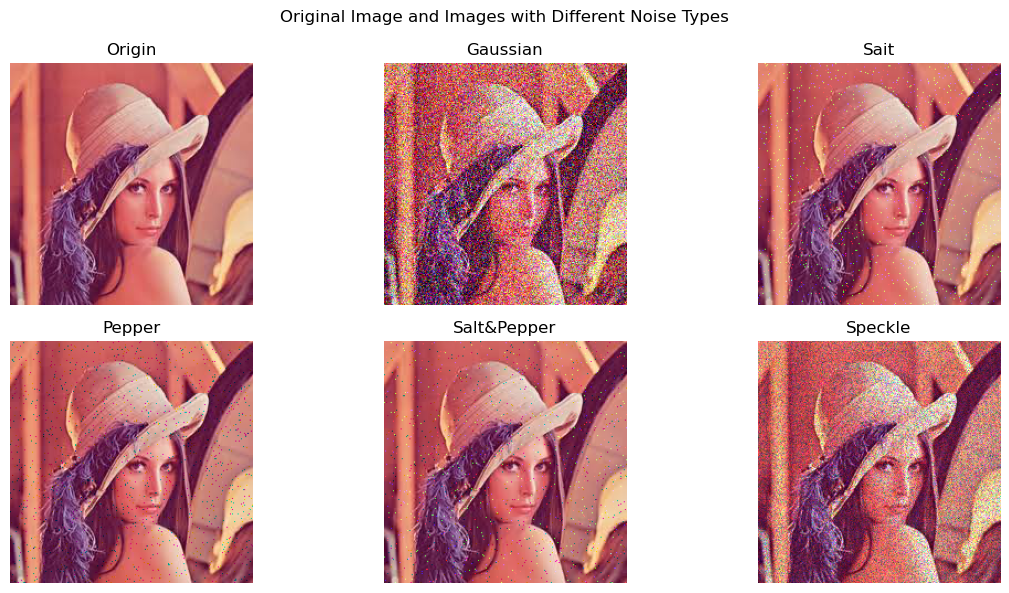

In [5]:
from skimage import io,util

# (a) Load an RGB image with Scikit-Image ('images/lena.jpg').
img5 = io.imread('images/lena.jpg')

noisy_img = {}
noisy_img['Origin'] = img5

# (b) Add 1) Gaussian noise, 2) salt noise, 3) pepper noise, 4) salt&pepper noise, and 5) speckle noise to it.
# Noise parameters 
mean = 0
var = 0.05  # Gaussian noise variance
amount = 0.012  # Salt and pepper noise amount
speckle_var = 0.06  # Speckle noise variance

# 1) Gaussian noise
noisy_img['Gaussian'] = util.random_noise(img5, mode='gaussian', mean=mean, var=var)
# 2) salt noise
noisy_img['Sait'] = util.random_noise(img5 ,mode='s&p', amount=amount, salt_vs_pepper=1)
# 3) pepper noise
noisy_img['Pepper'] = util.random_noise(img5 ,mode='s&p', amount=amount, salt_vs_pepper=0)
# 4) salt&pepper noise
noisy_img['Salt&Pepper'] = util.random_noise(img5 ,mode='s&p', amount=amount)
# 5) speckle noise
noisy_img['Speckle'] = util.random_noise(img5 ,mode='speckle', var=speckle_var)

# (c) Display these six images (including the original noiseless image) in the same figure and add the corresponding title.
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, (name, noisy_image) in enumerate(noisy_img.items()):
    row, col = divmod(i, 3)
    axes[row, col].imshow(noisy_image, cmap="gray")
    axes[row, col].set_title(name)
    axes[row, col].axis("off")
    
fig.suptitle("Original Image and Images with Different Noise Types")
plt.tight_layout()
plt.show()


### (6)	Image Denoising by Averaging. 

(a) Load an RGB image. 

(b) Add Gaussian noise with a mean value of 0 and a variance of 0.1 to it. 

(c) Display and compare the images before and after adding noise. 

(d) Use the ``for`` loop to add 3, 30, and 300 images with random Gaussian noise and find their average value, respectively. 

(e) Display these averaged images in the same figure. Add corresponding titles, and compare the results.

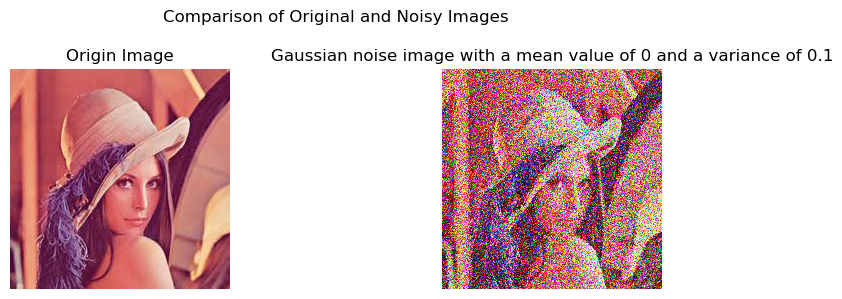

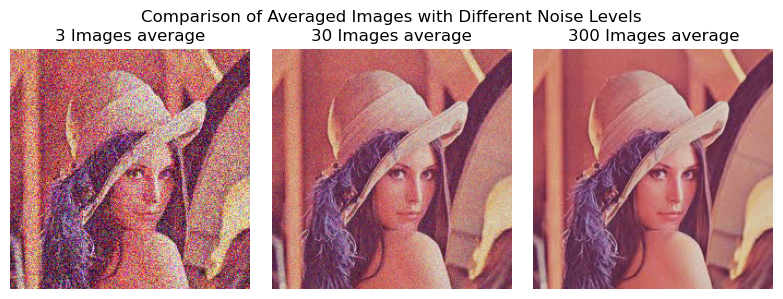

In [6]:
from skimage import io, util
import matplotlib.pyplot as plt
import numpy as np

# (a) Load an RGB image.
img6 = io.imread('images/lena.jpg')

#(b) Add Gaussian noise with a mean value of 0 and a variance of 0.1 to it.
mean = 0
var = 0.1  # Gaussian noise variance
noisy_image1 = util.random_noise(img6,mode='Gaussian', mean=mean, var=var)

#(c) Display and compare the images before and after adding noise.
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].imshow(img6)
axes[0].set_title('Origin Image')
axes[0].axis('off')

axes[1].imshow(noisy_image1)
axes[1].set_title('Gaussian noise image with a mean value of 0 and a variance of 0.1')
axes[1].axis('off')

fig.suptitle("Comparison of Original and Noisy Images")
plt.tight_layout()
plt.show()

# (d) Use the for loop to add 3, 30, and 300 images with random Gaussian noise and find their average value, respectively.
num_img = [3, 30, 300]
avg_img = {}

for num in num_img:
    noise_image = []
    for _ in range(num):
        noise_image.append(util.random_noise(img6,mode='Gaussian', mean=mean, var=var))
    avg_img[f'{num} Images average'] = np.mean(noise_image, axis=0)
    
# (e) Display these averaged images in the same figure. Add corresponding titles, and compare the results.
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
for i, (name, avg_img) in enumerate(avg_img.items()):
    axes[i].imshow(avg_img)
    axes[i].set_title(name)
    axes[i].axis("off")

fig.suptitle("Comparison of Averaged Images with Different Noise Levels")
plt.tight_layout()
plt.show()
    

### (7)	Image Algebraic Operations. 

(a) Download two pictures by yourself, and load these two pictures with OpenCV. 

(b) Perform algebraic operations of addition and subtraction (<font style="color:blue;">Tips : Pay attention to the size and type of the image during the calculation. If they are different, the larger image should be cropped or scaled</font>).

(c) Display the images before and after processing.

In [ ]:
import cv2
import matplotlib.pyplot as plt

# (a) Download two pictures by yourself, and load these two pictures with OpenCV.
img7 = cv2.imread('images/bunny.png')
img8 = cv2.imread('images/RGBimageA.tiff')
img7 = cv2.cvtColor(img7,cv2.COLOR_BGR2RGB)
img8 = cv2.cvtColor(img8,cv2.COLOR_BGR2RGB)

# (b) Perform algebraic operations of addition and subtraction 
height1, width1 = img7.shape[:2]
height2, width2 = img8.shape[:2]

# Check if the two images are the same size
if (height1,width1)!=(height2,width2):
    small_width = min(width1, width2)
    small_height = min(height1,height2)
    
img7 = cv2.resize(img7,(small_width, small_height)) 
img8 = cv2.resize(img8,(small_width, small_height)) 
    

# Perform addition and subtraction of the images
add_img = cv2.addWeighted(img7, 0.5, img8, 0.5, 0)
sub_img = cv2.subtract(img7,img8) 


# (c) Display the images before and after processing.
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img7)
plt.title('Origin Image 1')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img8)
plt.title('Origin Image 2')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(add_img)
plt.title('Add Image')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(sub_img)
plt.title('Subtract Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### (8)	Text adding. 

(a) Load the Lena image with OpenCV. 

(b) Employ a red rectangle to mark the 64x64 rectangle in the middle of image. (<font style="color:blue;">Tips: You may use ``cv2.rectangle``</font>) 

(c) Adding some black text on it. (<font style="color:blue;">Tips: You may use``cv2.putText``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_8.png) 
<center><font style="color:red;">** Figure 1. The result of adding content to Lean image** </font></center>

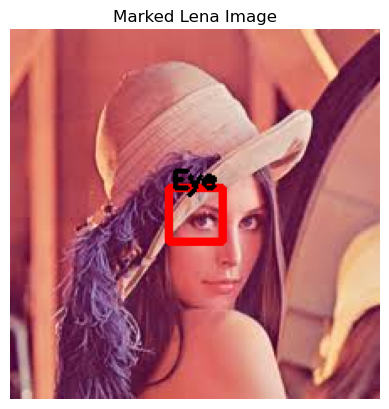

In [9]:
import cv2
import matplotlib.pyplot as plt
# (a) Load the Lena image with OpenCV.
img9 = cv2.imread('images/lena.jpg')
img9 = cv2.cvtColor(img9,cv2.COLOR_BGR2RGB)
# (b) Employ a red rectangle to mark the 64x64 rectangle in the middle of image.
height_lena, width_lena = img9.shape[:2]
height_middle = height_lena // 2
width_middle = width_lena // 2

# If the size of rectangle is 64*64, the result will not match the example, so I change the size to 32 to match the example image
rec_size = 32

top_left_x = max(0, width_middle - rec_size // 2 )
top_left_y = max(0, height_middle - rec_size // 2)
bottom_right_x = min(width_lena, (top_left_x + rec_size))
bottom_right_y = min(height_lena , (top_left_y + rec_size))
color = (255,0,0)

# Employ rectangle onto the image
cv2.rectangle(img9,(top_left_x,top_left_y),(bottom_right_x,bottom_right_y), color, 4)

# Employ text onto the image
text = 'Eye'
(font, fontScale, color, thickness) = (cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
(text_width, text_height), baseline = cv2.getTextSize(text, font, fontScale, thickness)
text_x = top_left_x + (rec_size - text_width) // 2
text_y = -10 + top_left_y + (rec_size - text_height) // 2
cv2.putText(img9,text, (text_x, text_y), font, fontScale, color, 2)

cv2.imwrite('results/marked_lena.jpg', img9)
plt.imshow(img9)
plt.axis('off')
plt.title('Marked Lena Image')
plt.show()

### (9)	Adding image mask. 

(a) Load the Lena image with OpenCV. 

(b) Adding a circular mask on the Lena image. (<font style="color:blue;">Tips: You may use``numpy.ogrid``</font>). An example of the generated result is shown in the figure below.
 
![lena.jpg](./images/exp1_9.png) 
<center><font style="color:red;">** Figure 2. The result of adding binary mask to Lean image** </font></center>

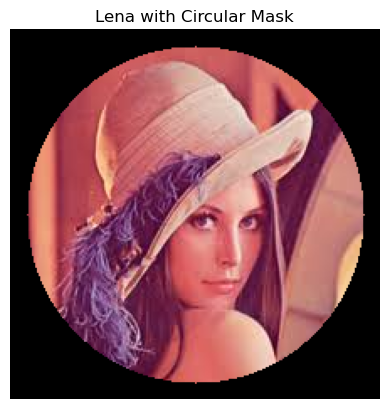

In [7]:
import numpy as np
import cv2

# (a) Load the Lena image with OpenCV
img9 = cv2.imread('images/lena.jpg')
img9 = cv2.cvtColor(img9,cv2.COLOR_BGR2RGB)
# (b) Adding a circular mask on the Lena image
rows, cols = img9.shape[:2]
X, Y = np.ogrid[:rows, :cols]
center_row, center_col = rows // 2, cols // 2
radius = 100  

dist_from_center = np.sqrt((X - center_row)**2 + (Y - center_col)**2)
circular_mask = (dist_from_center <= radius)

# Employ mask to the image
masked_lena = img9.copy()
masked_lena[~circular_mask] = 0 

# Save the masked image
cv2.imwrite('results/masked_lena.jpg', masked_lena)

plt.imshow(masked_lena)
plt.axis('off')
plt.title('Lena with Circular Mask')
plt.show()

### (10)	Capture Images by Laptop Camera with OpenCV. (``Bonus Task``)

(a) Read the video stream from the laptop camera.(For more details check [this](http://www.1zlab.com/wiki/python-opencv-tutorial/opencv-read-usb-camera-image/)) 

(b) Implement Time-lapse photography.(It can be used to record the whole process of the evaporation of water droplets in the cup. <font style="color:blue;"> Tips: You may use``time.sleep``</font>)

(c) Generate corresponding MP4 video or GIF image.

In [1]:
import cv2
import time

# (a) Open camera
cap = cv2.VideoCapture(0)

# Error handling (optional)
if not cap.isOpened():
    print("Error: Could not open camera!")
    exit(0)

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Video codec (adjust as needed)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter("Recordvideo.mp4", fourcc, 20.0, (width, height))

# Time-lapse parameters
is_recording = False  # Flag to indicate recording status
frames_captured = 0  # Number of frames captured

# Create a window to display the live recording
window_name = "Live Time-lapse"
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.resizeWindow(window_name, 640, 480) 

# Loop for capturing frames
while True:
    ret, frame = cap.read()

    # Error handling (optional)
    if not ret:
        print("Error: Could not capture frame!")
        break

    # Display the frame in the window
    cv2.imshow(window_name, frame)

    # Check if the window is closed
    key = cv2.waitKey(1) & 0xFF
    if cv2.getWindowProperty(window_name, cv2.WND_PROP_VISIBLE) < 1:
        break

    # Handle keyboard input
    # Start recording on 'r' press
    if key == ord('r'):
        if not is_recording:
            print("Recording started!")
            is_recording = True
            frames_captured = 0

    # Stop recording on 's' press
    if key == ord('s'):
        if is_recording:
            print("Recording stopped!")
            is_recording = False
            out.release()

    # Write frame to video if recording
    if is_recording:
        frames_captured += 1
        out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Time-lapse captured! Saved as: Recordvideo.mp4 ({frames_captured} frames)")


Recording started!
Recording stopped!
Time-lapse captured! Saved as: Recordvideo.mp4 (319 frames)


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Submit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.